<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/AD001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Signal Analysis: SR


Hansheng Ren, Bixiong Xu, Yujing Wang, Chao Yi, Congrui Huang, Xiaoyu Kou, Tony Xing, Mao Yang, Jie Tong, and Qi Zhang. 2019. Time-Series Anomaly Detection Service at Microsoft. In Proceedings of the International Conference on Knowledge Discovery and Data Mining (SIGKDD), 3009–3017. doi: 10.1145/3292500.3330680.

y ( t ) = A sin ( ω t + φ )

    A = amplitude, the peak deviation of the function from zero.
    f = frequency, measured in cycles per second, i.e. Hertz, Hz.
    ω = the angular frequency, in radians per second, 2πf.
    ϕ = phase, specified (in radians) where in its cycle the oscillation is at t = 0.

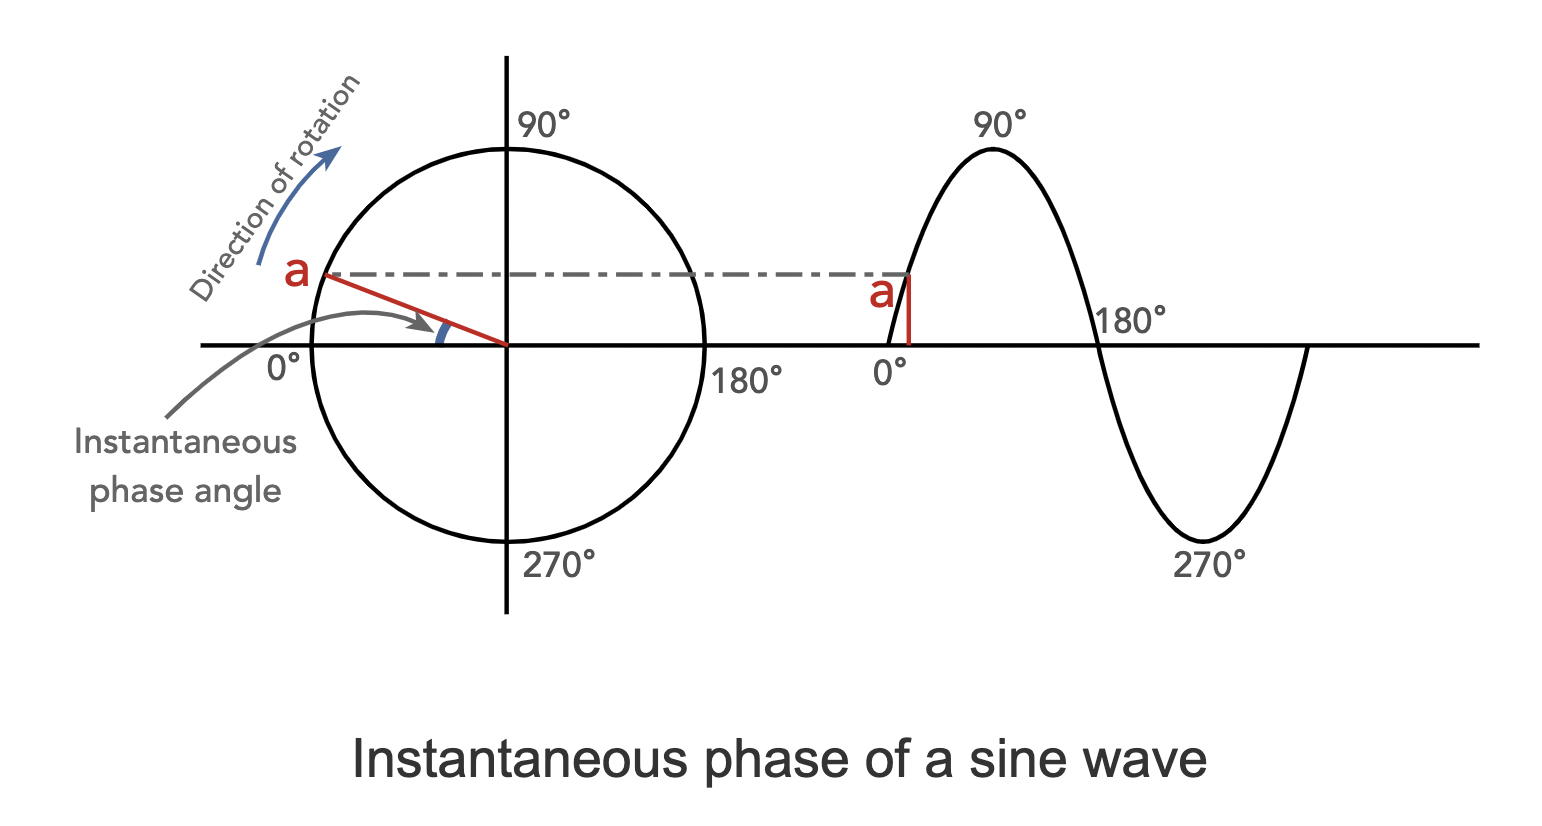

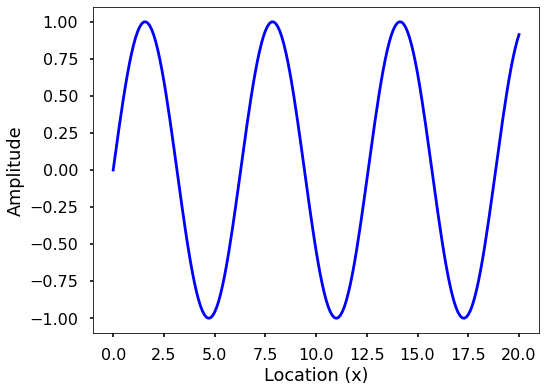

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

x = np.linspace(0, 20, 201)
y = np.sin(x)

plt.figure(figsize = (8, 6))
plt.plot(x, y, 'b')
plt.ylabel('Amplitude')
plt.xlabel('Location (x)')
plt.show()

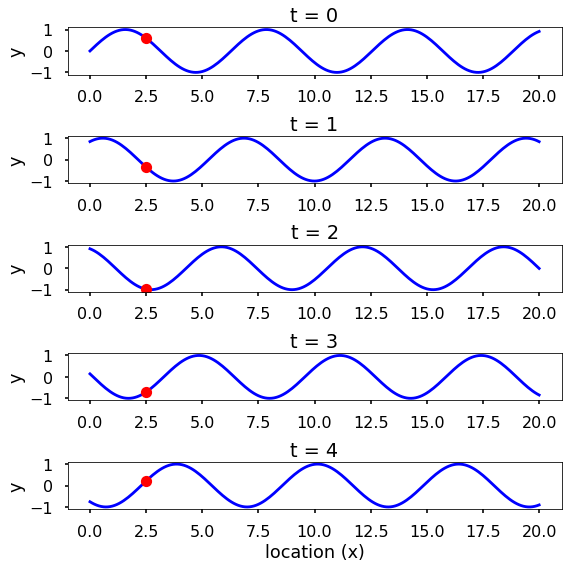

In [2]:
fig = plt.figure(figsize = (8,8))

times = np.arange(5)

n = len(times)

for t in times:
    plt.subplot(n, 1, t+1)
    y = np.sin(x + t)
    plt.plot(x, y, 'b')
    plt.plot(x[25], y [25], 'ro')
    plt.ylim(-1.1, 1.1)
    plt.ylabel('y')
    plt.title(f't = {t}')

plt.xlabel('location (x)')
plt.tight_layout()
plt.show()

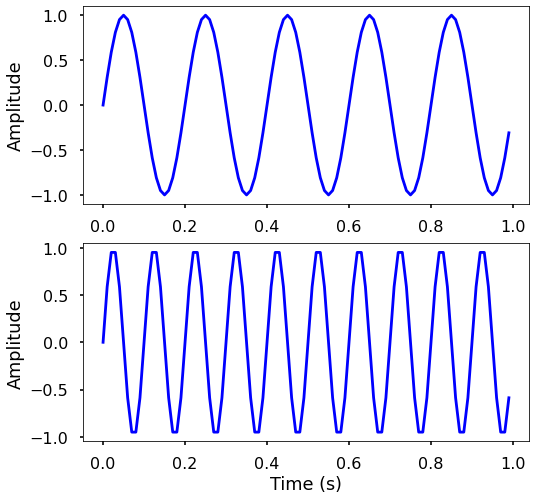

In [3]:
# sampling rate
sr = 100.0
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

# frequency of the signal
freq = 5   
y = np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 8))
plt.subplot(211)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

freq = 10   
y = np.sin(2*np.pi*freq*t)

plt.subplot(212)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

plt.xlabel('Time (s)')
plt.show()

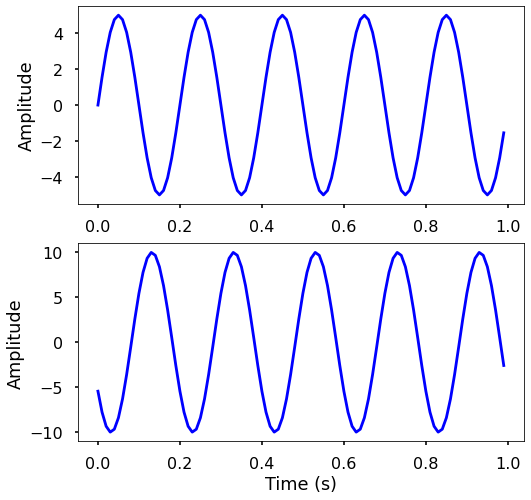

In [4]:
# frequency of the signal
freq = 5   
y = 5*np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 8))
plt.subplot(211)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

y = 10*np.sin(2*np.pi*freq*t + 10)

plt.subplot(212)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

plt.xlabel('Time (s)')
plt.show()

TRY IT! 

Generate 3 sine waves with frequencies 1 Hz, 4 Hz, and 7 Hz, amplitudes 3, 1 and 0.5, and phase all zeros. 

Add this 3 sine waves together with a sampling rate 100 Hz, you will see that it is the same signal we just shown.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

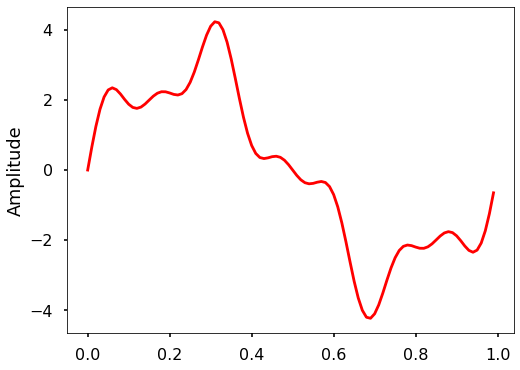

In [6]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

TRY IT! 

Write a function DFT(x) which takes in one argument, x - input 1 dimensional real-valued signal. 

The function will calculate the DFT of the signal and return the DFT values. 

Apply this function to the signal we generated above and plot the result.

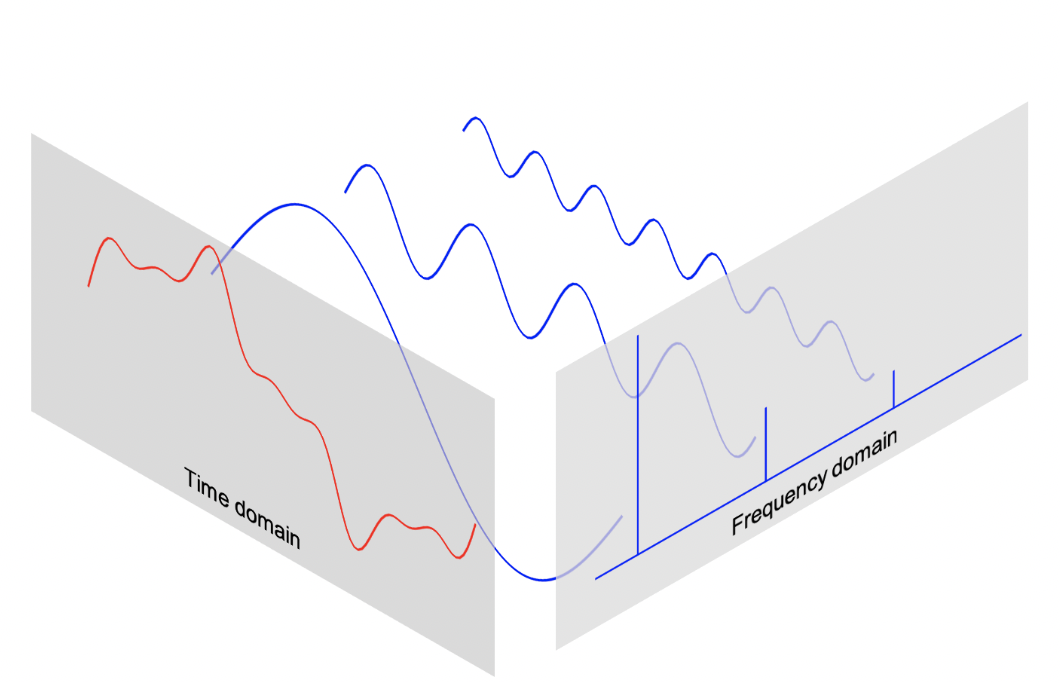

### DFT

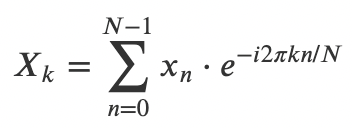

In [7]:
def DFT(x):
    """
    Function to calculate the 
    Discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


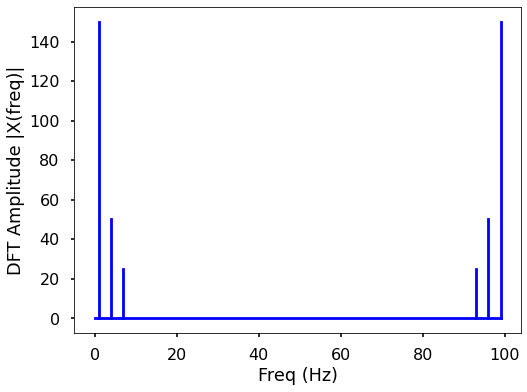

In [8]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

We can see from here that the output of the DFT is symmetric at half of the sampling rate (you can try different sampling rate to test). 


This half of the sampling rate is called Nyquist frequency or the folding frequency, it is named after the electronic engineer Harry Nyquist. 


He and Claude Shannon have the Nyquist-Shannon sampling theorem, which states that a signal sampled at a rate can be fully reconstructed if it contains only frequency components below half that sampling frequency, thus the highest frequency output from the DFT is half the sampling rate.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


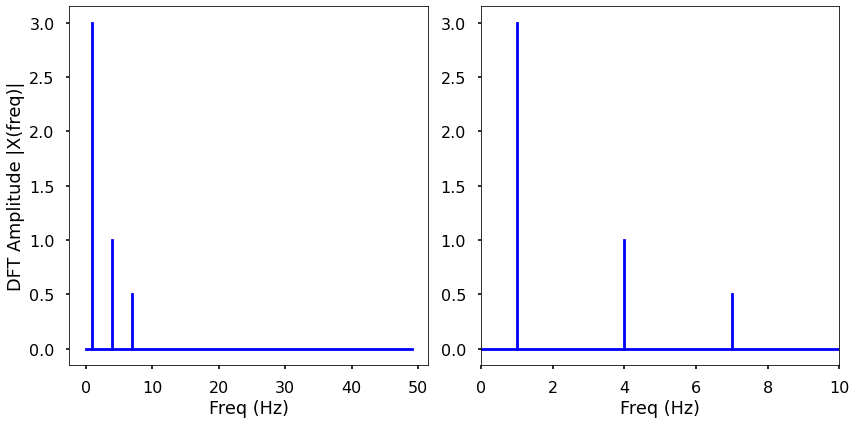

In [9]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

We can see by plotting the first half of the DFT results, we can see 3 clear peaks at frequency 1 Hz, 4 Hz, and 7 Hz, with amplitude 3, 1, 0.5 as expected. 


This is how we can use the DFT to analyze an arbitrary signal by decomposing it to simple sine waves.



### IDFT

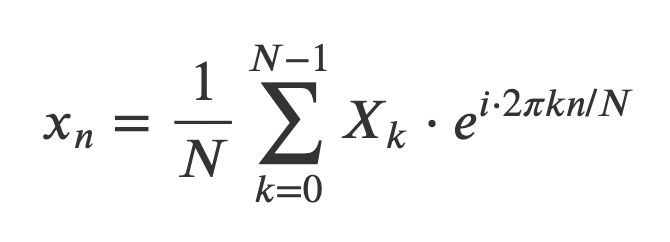

In [10]:

def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [11]:
# sampling rate = 2000
sr = 2000
%timeit DFT(gen_sig(sr))

387 ms ± 7.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
## sampling rate = 20000
#sr = 20000
#%timeit DFT(gen_sig(sr))

The main issue with the above DFT implementation is that it is not efficient if we have a signal with many data points. It may take a long time to compute the DFT if the signal is large.


TRY IT!


Write a function to generate a simple signal with different sampling rate, and see the difference of computing time by varying the sampling rate.

### FFT

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline




In [14]:
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

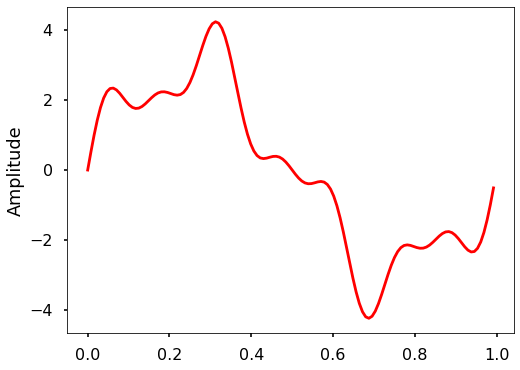

In [15]:
# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


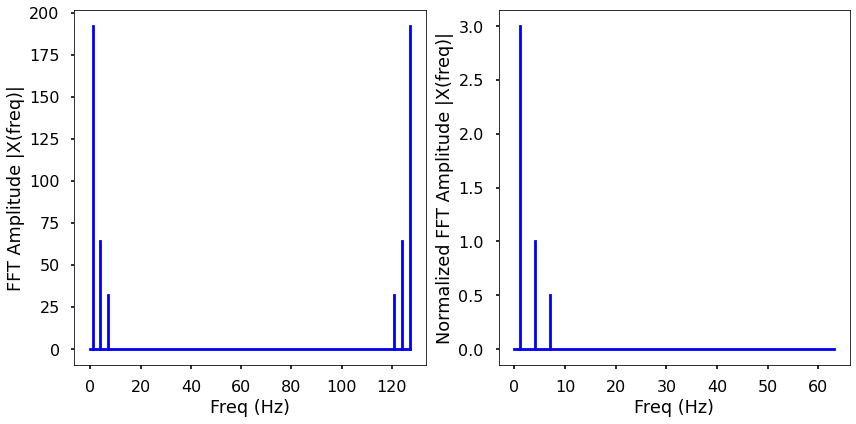

In [16]:
X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

In [17]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

# sampling rate = 2048
sr = 2048
%timeit FFT(gen_sig(sr))

32.2 ms ± 1.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### FFT in numpy

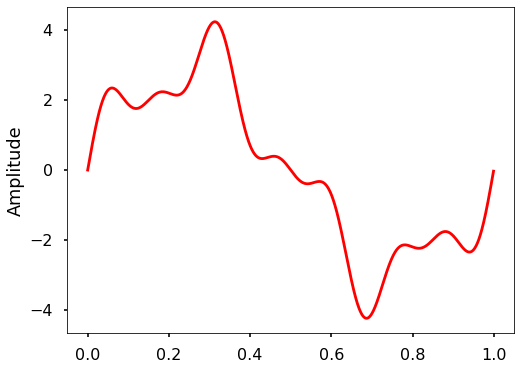

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


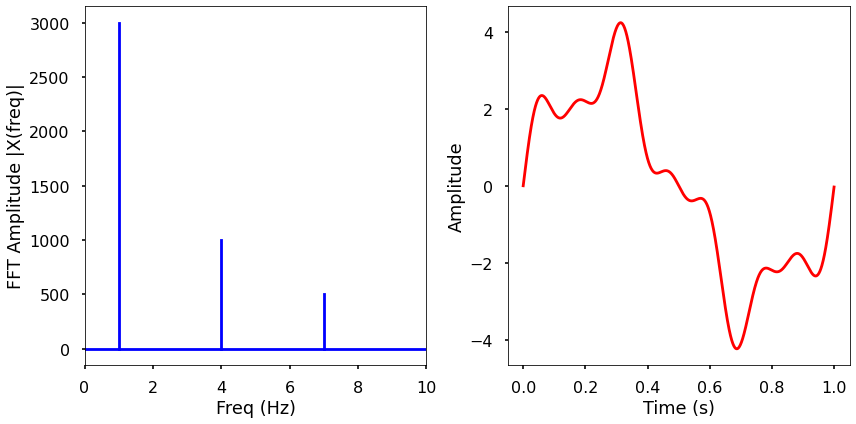

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline



# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()


from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


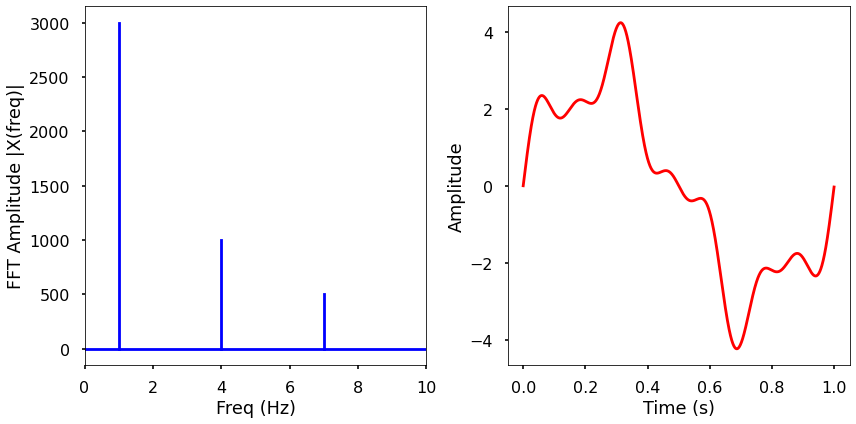

In [19]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [20]:
%timeit fft(x)

The slowest run took 4.31 times longer than the fastest. This could mean that an intermediate result is being cached.
74 µs ± 37.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### FFT in scipy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


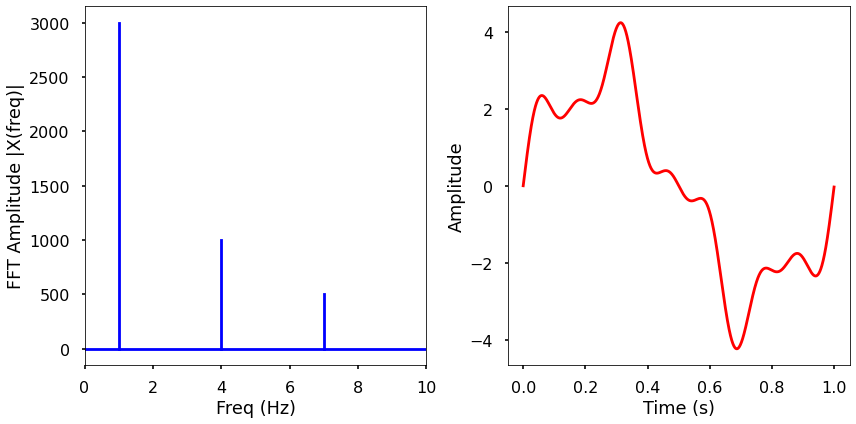

In [21]:
from scipy.fftpack import fft, ifft

X = fft(x)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [22]:
%timeit fft(x)

28.8 µs ± 1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


With a sampling frequency = 1000 Hz, you sample a given signal every 0.001 second
With a sampling frequency = 1000 Hz, signal time period = 0.001 second


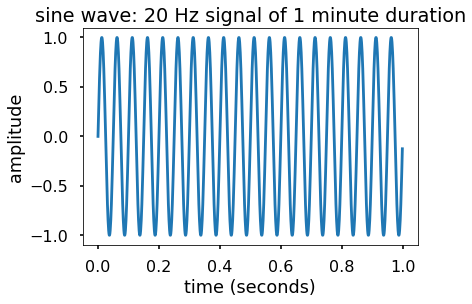

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft


"""
How to do Spectral analysis or FFT of Signal in Python?
1. number of cycles per second = (sampling frequency) / (signal frequency)
2. The sampling frequency (or, sampling rate) is the average number of samples
obtained in one second (samples per second), and fs = 1 / T (fs = sampling
frequency).

Refer:
https://mulloverthing.com/how-do-you-calculate-samples-per-cycle/
https://www.electronics-notes.com/articles/basic_concepts/electronic-electrical-waveforms/sine-waveform.php
https://www.testandmeasurementtips.com/basics-sine-waves/
https://betterexplained.com/articles/intuitive-understanding-of-sine-waves/
"""

## 1.Generate (the spectrum of) a sine wave signal:


# Define sampling frequency (when dealing with signals, sampling frequency plays a critical role).
sampling_freq = 1000
# 1000 Hz

print(f"With a sampling frequency = {sampling_freq} Hz, you sample a given signal every {1 / sampling_freq} second")
# With a sampling frequency = 1000 Hz, you sample a given signal every 0.001 second

print(f"With a sampling frequency = {sampling_freq} Hz, signal time period = {1 / sampling_freq} second")
# With a sampling frequency = 1000 Hz, signal time period = 0.001 second

# We then create a time axis/variable.
t = np.arange(0, 1, 1 / sampling_freq)
# We are generating a signal with a duration of 1 second. And the period between two time samples is (1 / sampling_freq).

t.shape
# (1000,)

t.min(), t.max()
# (0.0, 0.999)

# Say we create a signal frequency of 20 Hz.
signal_freq = 20

# Create/generate a signal.
x = np.sin(2 * np.pi * signal_freq * t)


# Visualize the created sine wave.
plt.plot(t, x)
plt.title("sine wave: 20 Hz signal of 1 minute duration")
plt.xlabel("time (seconds)")
plt.ylabel("amplitude")
plt.show()

# There are 20 sine waves in the given time duration of 1 minute.


1.4142135623730951


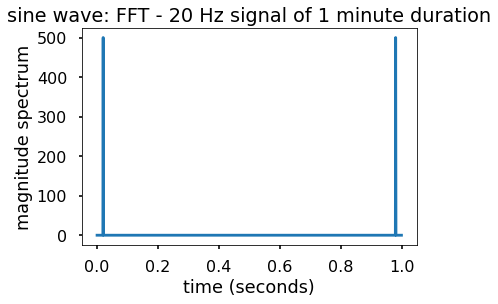

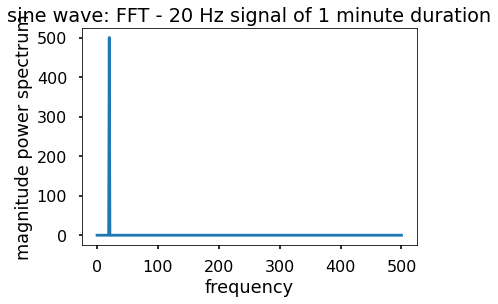

In [24]:


## 2.Compute FFT (or, spectrum):


x_fft = fft(x)
# This will be a double sided spectrum.
# 'x_fft' is a complex quantity having both magnitude and phase.
# Here, we only focus on the magnitude spectrum, and so we take its absolute value.

print(np.abs(1+1j))
plt.plot(t, np.abs(x_fft))
#plt.plot(t, x_fft)
plt.title("sine wave: FFT - 20 Hz signal of 1 minute duration")
plt.xlabel("time (seconds)")
plt.ylabel("magnitude spectrum")
plt.show()


# We get two spikes because it's going from 0 to 2*pi. 
# It is repeating 10 intervals of pi. Basic concepts of DSP.

# We only want to plot half of this magnitude spectrum because all of the spectrum information is contained up to half of it. 
# And for this, we need to generate the frequency axis.

# To compute the frequency axis, first compute the number of elements in the time.
# This helps in creating an exact frequency axis.
n = t.size

n
# 1000

# Create frequency axis.
freq = np.linspace(0, 1, int(n / 2)) * (sampling_freq / 2)
# We use (n / 2) because our sampling frequency = 1000 Hz, and this frequency axis should go up to half of the sampling frequency.
# Our frequency axis will go from 0 Hz to 500 Hz according to the sampling theorem.
# We are making it 500 with (sampling_freq / 2) and then we are generating an equal spaced samples with 'np.linspace()' between 0 to 1 with a interval of (n / 2).

freq.shape
# (500,)

# 'x_fft' contains double sided spectrum and (for now) we are interested only in half of it. We want to extract the magnitude of the FFT.
x_m = np.abs(x_fft[0: int(n / 2)])

# Extract half of it.
plt.plot(freq, x_m)
plt.title("sine wave: FFT - 20 Hz signal of 1 minute duration")
plt.xlabel("frequency")
plt.ylabel("magnitude power spectrum")
plt.show()

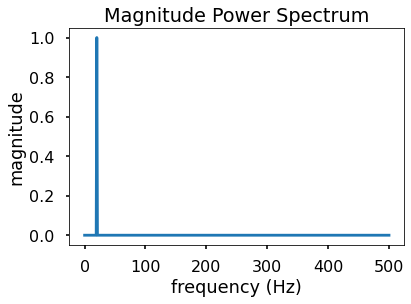

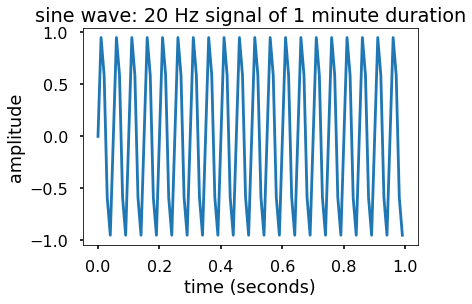

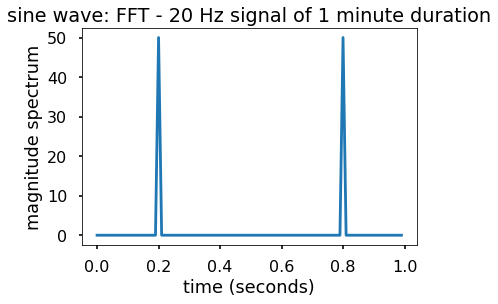

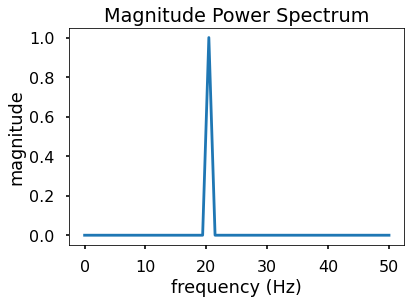

In [25]:
# We are getting only one spike, approximately around 20 Hz. Its magnitude is going up to 500, while our signal amplitude was only 1.

# To demonstrate the magnitude spectrum more appropriately, we need to normalize the magnitude spectrum, which can be done simply with (2 / length of sequence) = (2 / n).
x_m = (2 / n) * np.abs(x_fft[0: int(n / 2)])

# Extract half of it.
plt.plot(freq, x_m)
plt.title("Magnitude Power Spectrum")
plt.xlabel("frequency (Hz)")
plt.ylabel("magnitude")
plt.show()
# And now, we can see that maximum amplitude is 1 which is represented by a signal having a frequency of 20 Hz (original plot above).




# We verify these concepts by taking more example having one frequency component:
sampling_freq = 100

# A sampling frequency of 100 Hz is sufficient as we are plotting a 20 Hz signal.
t = np.arange(0, 1, 1 / sampling_freq)

t.shape
# (100,)

# Create/generate a signal.
x = np.sin(2 * np.pi * signal_freq * t)

# Visualize the created sine wave.
plt.plot(t, x)
plt.title("sine wave: 20 Hz signal of 1 minute duration")
plt.xlabel("time (seconds)")
plt.ylabel("amplitude")
plt.show()

x_fft = fft(x)
# This will be a double sided spectrum.
# 'x_fft' is a complex quantity having both magnitude and phase. Here, we only focus on the magnitude spectrum, we take its absolute value.

plt.plot(t, np.abs(x_fft))
plt.title("sine wave: FFT - 20 Hz signal of 1 minute duration")
plt.xlabel("time (seconds)")
plt.ylabel("magnitude spectrum")
plt.show()

n = t.size

n
# 100

# Create frequency axis.
freq = np.linspace(0, 1, int(n / 2)) * (sampling_freq / 2)

freq.shape
# (50,)

x_m = (2 / n) * np.abs(x_fft[0: int(n / 2)])

# Extract half of it.
plt.plot(freq, x_m)
plt.title("Magnitude Power Spectrum")
plt.xlabel("frequency (Hz)")
plt.ylabel("magnitude")
plt.show()
# We have a maximum amplitude is 1 which is represented by a signal having a 20 Hz signal.


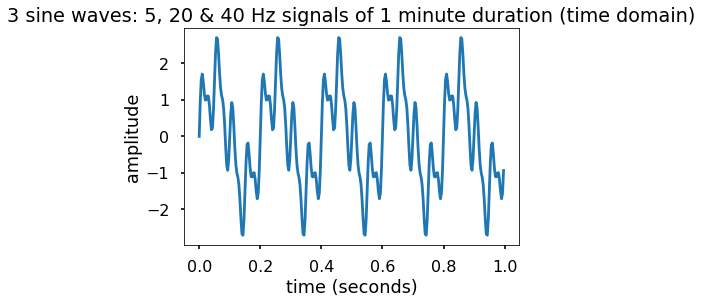

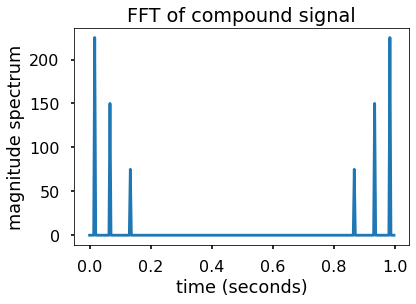

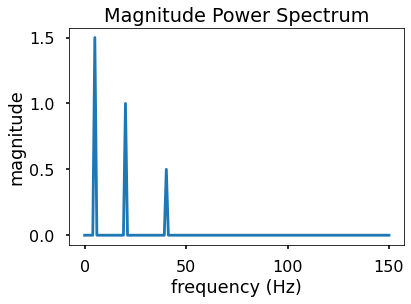

In [26]:


## 3.Final example:

# Sampling frequency of 300 Hz.
sampling_freq = 300

t = np.arange(0, 1, 1 / sampling_freq)

t.shape
# (300,)

# Create/generate a signal.
x = np.sin(2 * np.pi * signal_freq * t) + (0.5 * np.sin(2 * np.pi * 40 * t)) + \
(1.5 * np.sin(2 * np.pi * 5 * t))

# Visualize the compunded signal consisting of 3 sine waves.
plt.plot(t, x)
plt.title("3 sine waves: 5, 20 & 40 Hz signals of 1 minute duration (time domain)")
plt.xlabel("time (seconds)")
plt.ylabel("amplitude")
plt.show()

# Compute FFT.
x_fft = fft(x)


# This will be a double sided spectrum.
# 'x_fft' is a complex quantity having both magnitude and phase. Here, we only focus on the magnitude spectrum, so we take its absolute value.

plt.plot(t, np.abs(x_fft))
plt.title("FFT of compound signal")
plt.xlabel("time (seconds)")
plt.ylabel("magnitude spectrum")
plt.show()

n = t.size

n
# 300

# Create frequency axis.
freq = np.linspace(0, 1, int(n / 2)) * (sampling_freq / 2)

freq.shape
# (150,)

x_m = (2 / n) * np.abs(x_fft[0: int(n / 2)])

# Extract half of it.
plt.plot(freq, x_m)
plt.title("Magnitude Power Spectrum")
plt.xlabel("frequency (Hz)")
plt.ylabel("magnitude")
plt.show()

# We see the corresponding 3 components occurring in our input signal denoted by the 3 peaks at 5, 20 and 40 Hz. 
# The 5 Hz signal has an amplitude = 1.5, the 20 Hz signal has an amplitude of 1.0, and the 40 Hz signal has an amplitude of 0.5.
# Interpret different frequency component(s) from the magnitude spectrum.
